<a href="https://colab.research.google.com/github/LifnaJos/ADC601-Data-Analytics-Visualization/blob/main/M3_DAV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Analysis using Python

Courtesy for Time Series Analysis using ARIMA Model :
* https://www.kaggle.com/code/ahmadjalalmasood123/time-series-analysis-using-arima-model
* https://www.youtube.com/watch?v=e8Yw4alG16Q
* https://www.kaggle.com/code/lejcruz/time-series-analysis-python
* https://www.youtube.com/playlist?list=PLqYFiz7NM_SMC4ZgXplbreXlRY4Jf4zBP

Courtesy for Dataset - [Air Passengers.csv (Kaggle)](https://www.kaggle.com/datasets/rakannimer/air-passengers?resource=download)

## Step - 1 : Importing Python Packages, Loading Data and Displaying the top 5 and last 5 rows

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
rcParams['figure.figsize']=10,6

In [2]:
dataset = pd. read_csv("accidental-deaths-in-usa-monthly.csv")
dataset.describe()

,Accidental
count,72.000000
mean,8787.736111
std,958.338013
min,6892.000000
25%,8089.000000
50%,8728.500000
75%,9323.250000
max,11317.000000


In [3]:
# Parse strings to datatime type
dataset['Month'] = pd.to_datetime(dataset['Month'], infer_datetime_format=True)
indexedDataset = dataset.set_index(['Month'])

C:\Users\Pulikesh\AppData\Local\Temp\ipykernel_31284\4212836207.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  dataset['Month'] = pd.to_datetime(dataset['Month'], infer_datetime_format=True)


In [4]:
indexedDataset.head(5)

,Accidental
Month,
1973-01-01,9007
1973-02-01,8106
1973-03-01,8928
1973-04-01,9137
1973-05-01,10017


In [5]:
indexedDataset.tail(5)

,Accidental
Month,
1978-08-01,9827
1978-09-01,9110
1978-10-01,9070
1978-11-01,8633
1978-12-01,9240


## Step - 2 : Plotting the raw data

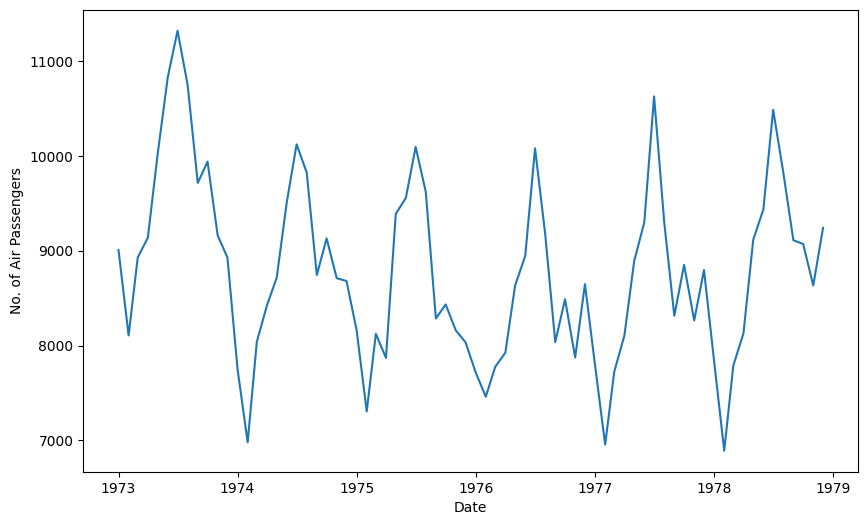

In [6]:
# Plot graph
plt.xlabel("Date")
plt.ylabel("No. of Air Passengers")
plt.plot(indexedDataset)

## Step - 3 : Check the stationarity of raw data

### a. Using Rolling Statistics

In [7]:
# Detecting Stationarity using Rolling Statistics
# As the mean is not constant, That
# rolling mean at yearly level
rollmean = indexedDataset.rolling(window=12).mean()
# rolling std at yearly level
rollstd = indexedDataset.rolling(window=12).std()
print(rollmean, rollstd)

             Accidental
Month                  
1973-01-01          NaN
1973-02-01          NaN
1973-03-01          NaN
1973-04-01          NaN
1973-05-01          NaN
...                 ...
1978-08-01  8644.416667
1978-09-01  8710.750000
1978-10-01  8729.083333
1978-11-01  8759.750000
1978-12-01  8796.750000

[72 rows x 1 columns]             Accidental
Month                 
1973-01-01         NaN
1973-02-01         NaN
1973-03-01         NaN
1973-04-01         NaN
1973-05-01         NaN
...                ...
1978-08-01  984.623182
1978-09-01  987.149351
1978-10-01  992.001600
1978-11-01  981.988347
1978-12-01  991.794070

[72 rows x 1 columns]


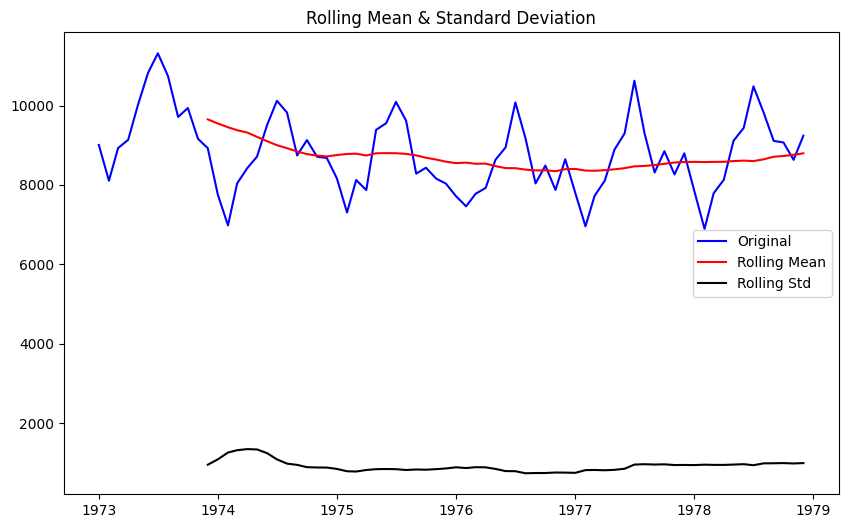

In [8]:
# Plot rolling statistics
orig = plt.plot(indexedDataset, color = 'blue', label = "Original")
mean = plt.plot(rollmean, color = 'red', label = "Rolling Mean")
std = plt.plot(rollstd, color = 'black', label = "Rolling Std")
plt.legend(loc = "best")
plt.title("Rolling Mean & Standard Deviation")
plt.show()

### b. Using Augmented Dicky-Fuller (ADF) Test

In [9]:
# Perform Dicky-Fuller Test
#import statsmodels.tsa.stattools
from statsmodels.tsa.stattools import adfuller
print("Results of Dickey Fuller Test")
# Here AIC helps to analyse the exact value from actual values and difference between them
dftest = adfuller(indexedDataset['Accidental'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4],index=['Test statistic','p-value','#Lags used','No. of observations used'])
for key, value in dftest[4].items():
  dfoutput['Critical value (%s)'%key]= value

print(dfoutput)

Results of Dickey Fuller Test
Test statistic              -2.555798
p-value                      0.102481
#Lags used                  12.000000
No. of observations used    59.000000
Critical value (1%)         -3.546395
Critical value (5%)         -2.911939
Critical value (10%)        -2.593652
dtype: float64


### c. test_stationarity()

 - Returns Plotting of Rolling Statistics
 - Test Statistics of Augmented Dicky-Fuller (ADF) test

In [10]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeSeries):
  # Determinig Rolling statistics
  movingaverage = timeSeries.rolling(window=12).mean()
  movingSTD = timeSeries.rolling(window=12).std()

  # Plot rolling statistics
  orig = plt.plot(timeSeries, color = 'blue', label = "Original")
  mean = plt.plot(movingaverage, color = 'red', label = "Rolling Mean")
  std = plt.plot(movingSTD, color = 'black', label = "Rolling Std")
  plt.legend(loc = "best")
  plt.title("Rolling Mean & Standard Deviation")
  plt.show()

  # Perform Dickey-Fuller Test
  print("Results of Dickey Fuller Test")
  dftest = adfuller(timeSeries['Accidental'], autolag='AIC')
  dfoutput = pd.Series(dftest[0:4],index=['Test statistic','p-value','#Lags used','No. of observations used'])
  for key, value in dftest[4].items():
    dfoutput['Critical value (%s)'%key]= value
  print(dfoutput)

## Step - 4 : Perform transformation to incorporate stationarity

#### Applying LogSCale to Raw Data

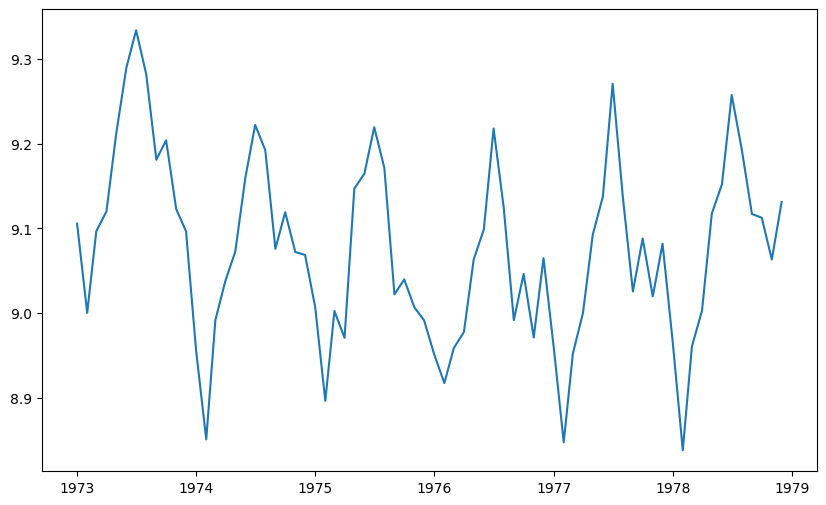

In [11]:
# Estimating trend
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

***Observation*** : When plotted, the scale changes as raw data is transformed to Logarithmic Scale

### Transformation - 1 : Subtracting Moving Average from LogScale Data

#### 1(a) : Computation

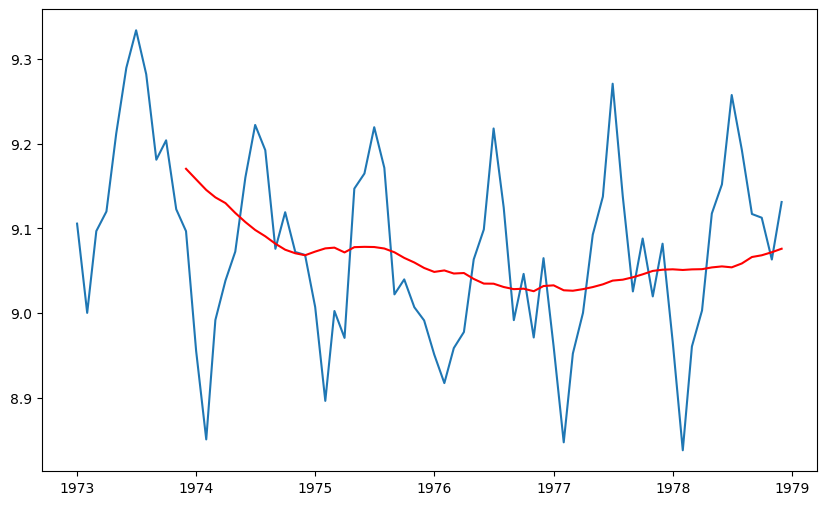

In [12]:
movingaverage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingaverage, color='red')
#plt.plot(movingSTD, color='black')

In [13]:
dataLogScaleMinusMovingAverage = indexedDataset_logScale - movingaverage
dataLogScaleMinusMovingAverage.head(12)

,Accidental
Month,
1973-01-01,NaN
1973-02-01,NaN
1973-03-01,NaN
1973-04-01,NaN
1973-05-01,NaN
1973-06-01,NaN
1973-07-01,NaN
1973-08-01,NaN
1973-09-01,NaN


In [14]:
#Remove NaN values
dataLogScaleMinusMovingAverage.dropna(inplace=True)
dataLogScaleMinusMovingAverage.head(18)

,Accidental
Month,
1973-12-01,-0.073660
1974-01-01,-0.202522
1974-02-01,-0.294571
1974-03-01,-0.144832
1974-04-01,-0.091375
1974-05-01,-0.045679
1974-06-01,0.052728
1974-07-01,0.124003
1974-08-01,0.101685


#### 1(b) : Plotting

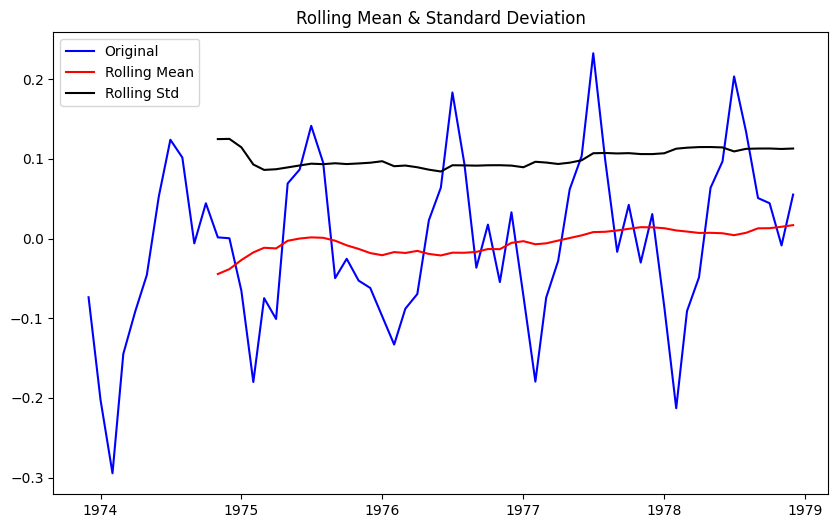

Results of Dickey Fuller Test
Test statistic              -1.982618
p-value                      0.294246
#Lags used                  11.000000
No. of observations used    49.000000
Critical value (1%)         -3.571472
Critical value (5%)         -2.922629
Critical value (10%)        -2.599336
dtype: float64


In [15]:
test_stationarity(dataLogScaleMinusMovingAverage)

Note :
* Test statistics & Critical values are almost equal. This helps to understand whether your data is stationary or not.
* p-value is almost nearer to 0


### Transformation - 2 : Subtrating Exponential Decay Weighted Average from LogScale Data

#### 2(a) : Computation

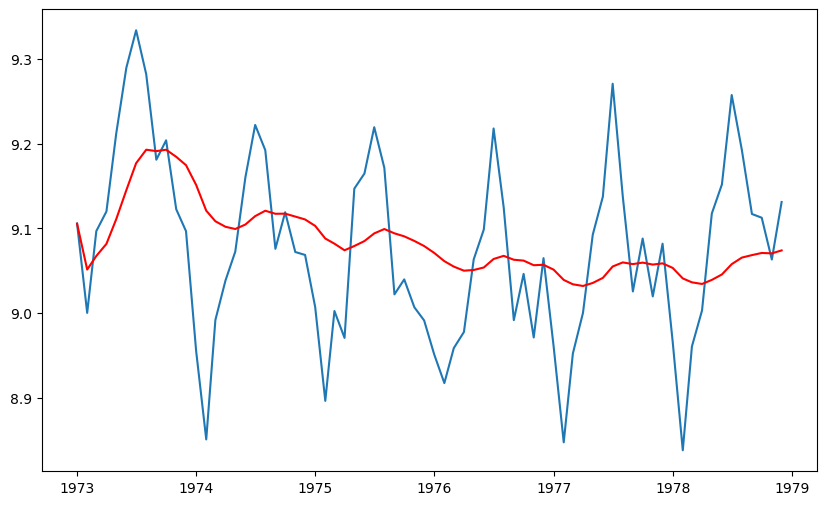

In [16]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=12,min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage,color='red')

As the time series progresses, the average is also progessing to higher side

In [17]:
datasetLogScaleMinusMovingExponentialDecayAverage = indexedDataset_logScale - exponentialDecayWeightedAverage

#### 2(c) :  Plotting

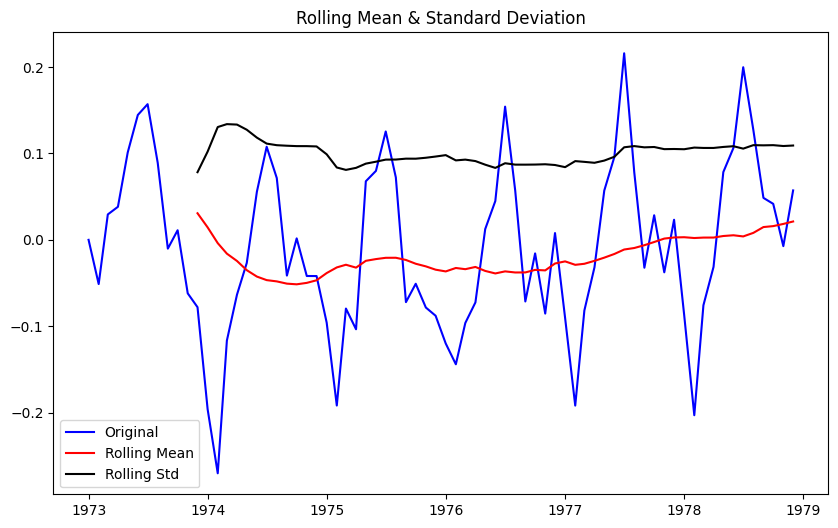

Results of Dickey Fuller Test
Test statistic              -1.046041
p-value                      0.736104
#Lags used                  12.000000
No. of observations used    59.000000
Critical value (1%)         -3.546395
Critical value (5%)         -2.911939
Critical value (10%)        -2.593652
dtype: float64


In [18]:
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

* The std deviation is almost flat. That means there is no trend.
* Rolling mean better than previous results.
* p value is nearing 0 ==> time series stationary.

## Step - 5 : Understanding the **Components** of Time Series

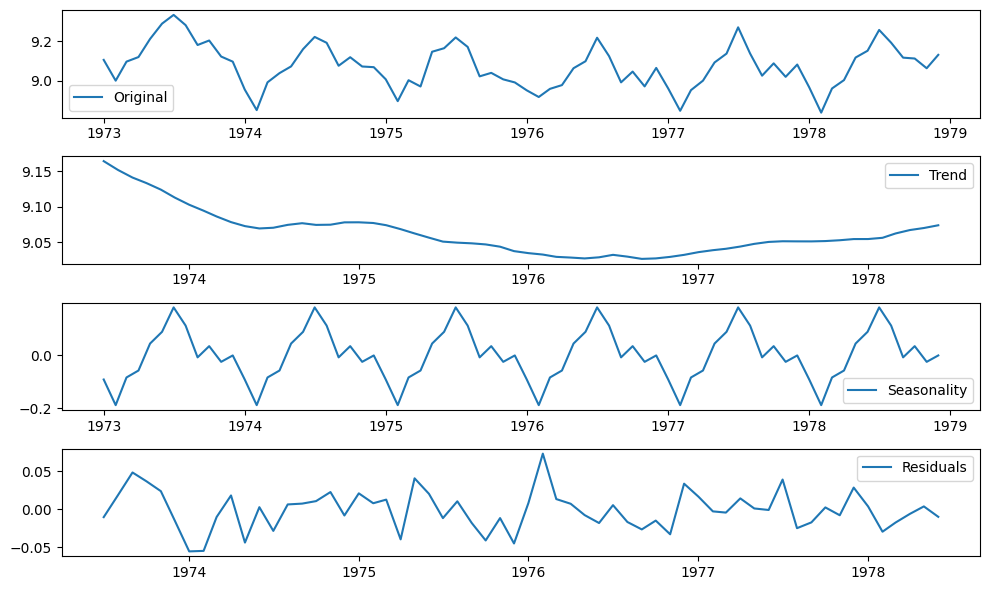

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logScale)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.subplot(411)
plt.plot(indexedDataset_logScale, label = 'Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

* It shows a positive trend
* Depicts the seasonality component in the dataset
* Depicts the irregularity /  residuals present in the data

## Step - 6 : Check whether the noise is stationary or not

In [20]:
decomposedLogData = residual
decomposedLogData.dropna(inplace = True)
print(decomposedLogData)

Month
1973-07-01   -0.010437
1973-08-01    0.018812
1973-09-01    0.048425
1973-10-01    0.036810
1973-11-01    0.023796
1973-12-01   -0.015019
1974-01-01   -0.055569
1974-02-01   -0.054909
1974-03-01   -0.010264
1974-04-01    0.018156
1974-05-01   -0.043944
1974-06-01    0.002698
1974-07-01   -0.028563
1974-08-01    0.006315
1974-09-01    0.007396
1974-10-01    0.010694
1974-11-01    0.022629
1974-12-01   -0.008252
1975-01-01    0.020923
1975-02-01    0.007880
1975-03-01    0.012658
1975-04-01   -0.039729
1975-05-01    0.040735
1975-06-01    0.020265
1975-07-01   -0.011735
1975-08-01    0.010448
1975-09-01   -0.018107
1975-10-01   -0.041153
1975-11-01   -0.011672
1975-12-01   -0.045135
1976-01-01    0.008211
1976-02-01    0.073261
1976-03-01    0.013374
1976-04-01    0.007181
1976-05-01   -0.007743
1976-06-01   -0.018187
1976-07-01    0.005375
1976-08-01   -0.016831
1976-09-01   -0.026617
1976-10-01   -0.014978
1976-11-01   -0.033028
1976-12-01    0.033645
1977-01-01    0.016498
1977-

In [21]:
decomposedLogData.describe()

count    60.000000
mean     -0.001247
std       0.025516
min      -0.055569
25%      -0.016956
50%       0.000004
75%       0.013597
max       0.073261
Name: resid, dtype: float64

In [22]:
decomposedLogData.head(12)

Month
1973-07-01   -0.010437
1973-08-01    0.018812
1973-09-01    0.048425
1973-10-01    0.036810
1973-11-01    0.023796
1973-12-01   -0.015019
1974-01-01   -0.055569
1974-02-01   -0.054909
1974-03-01   -0.010264
1974-04-01    0.018156
1974-05-01   -0.043944
1974-06-01    0.002698
Name: resid, dtype: float64

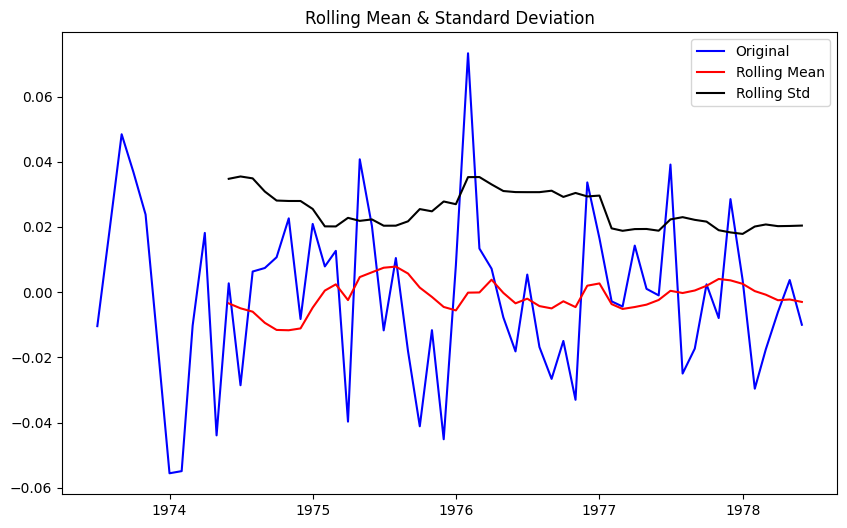

Results of Dickey Fuller Test


KeyError: 'Accidental'

In [23]:
test_stationarity(decomposedLogData)

Observation : The residuals are not stationary.

## Step - 7 : Implement the AR Model

### 7(a) : Plot the ACF and PACF graphs
- for LogScale Data from whihc Exponential Decay Weighted Average is subtracted

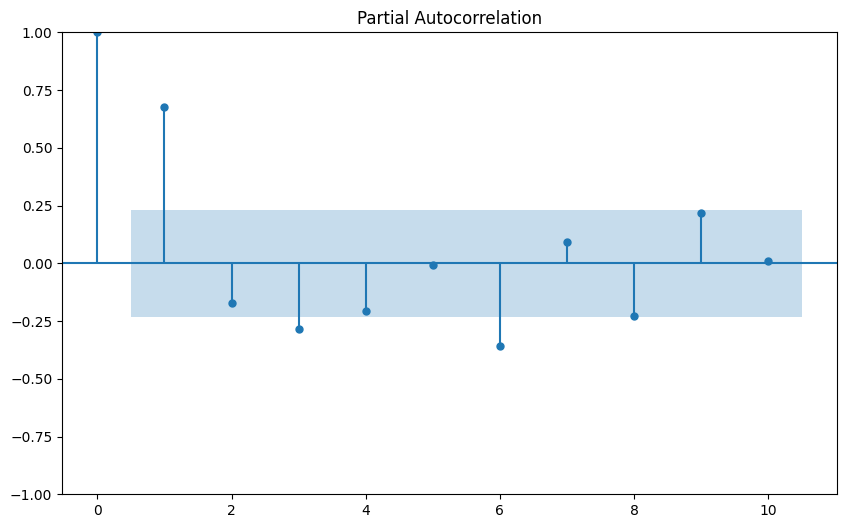

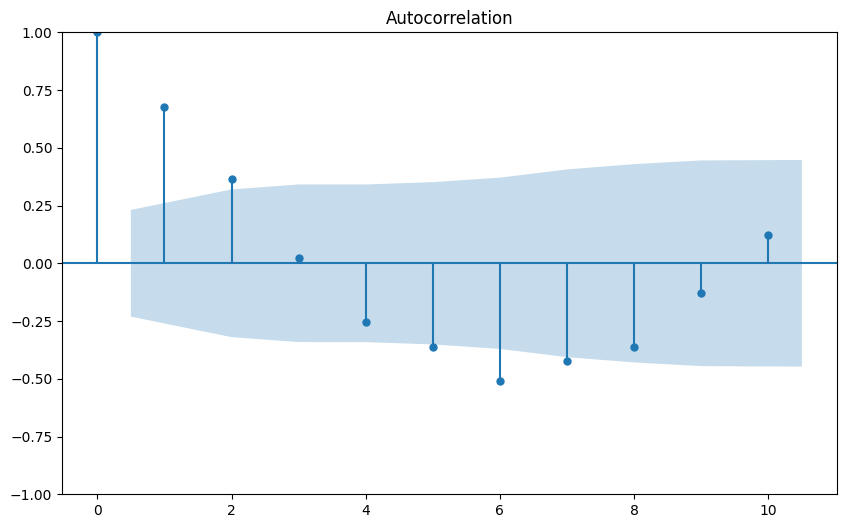

In [24]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
pacf=plot_pacf(datasetLogScaleMinusMovingExponentialDecayAverage,lags=10)
acf=plot_acf(datasetLogScaleMinusMovingExponentialDecayAverage,lags=10)

### 7(b) : Split the LogScale Data for Training & Testing
- Training with 7 years data
- Testing with 5 years data

In [25]:
train=datasetLogScaleMinusMovingExponentialDecayAverage[:len(datasetLogScaleMinusMovingExponentialDecayAverage)-60]
test=datasetLogScaleMinusMovingExponentialDecayAverage[len(datasetLogScaleMinusMovingExponentialDecayAverage)-60:]

### 7(c) : Train the AR Model

In [26]:
from statsmodels.tsa.ar_model import AutoReg
# AR Model with p = 2 from PACF plot
model_1 = AutoReg(train, lags=1).fit()

C:\Users\Pulikesh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [27]:
print(model_1.summary())

                            AutoReg Model Results                             
Dep. Variable:             Accidental   No. Observations:                   12
Model:                     AutoReg(1)   Log Likelihood                  16.402
Method:               Conditional MLE   S.D. of innovations              0.054
Date:                Sun, 31 Mar 2024   AIC                            -26.804
Time:                        23:40:46   BIC                            -25.611
Sample:                    02-01-1973   HQIC                           -27.557
                         - 12-01-1973                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0016      0.019      0.084      0.933      -0.036       0.039
Accidental.L1     0.7865      0.233      3.371      0.001       0.329       1.244
                                    Root

Observation : Lower the p value, more significant that time lag

In [28]:
# Experimenting with lag = 10
# model_2 = AutoReg(train, lags=10).fit()
#print(model_2.summary())

### 7(d) : Test the AR Model

In [29]:
pred=model_1.predict(start=len(train),end=len(datasetLogScaleMinusMovingExponentialDecayAverage)-1, dynamic=False)

C:\Users\Pulikesh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [30]:
print(len(train))

12


In [31]:
print(pred)

1974-01-01   -0.059707
1974-02-01   -0.045370
1974-03-01   -0.034094
1974-04-01   -0.025225
1974-05-01   -0.018249
1974-06-01   -0.012763
1974-07-01   -0.008447
1974-08-01   -0.005053
1974-09-01   -0.002383
1974-10-01   -0.000284
1974-11-01    0.001368
1974-12-01    0.002667
1975-01-01    0.003689
1975-02-01    0.004492
1975-03-01    0.005124
1975-04-01    0.005621
1975-05-01    0.006012
1975-06-01    0.006320
1975-07-01    0.006562
1975-08-01    0.006752
1975-09-01    0.006902
1975-10-01    0.007019
1975-11-01    0.007112
1975-12-01    0.007185
1976-01-01    0.007242
1976-02-01    0.007287
1976-03-01    0.007322
1976-04-01    0.007350
1976-05-01    0.007372
1976-06-01    0.007389
1976-07-01    0.007403
1976-08-01    0.007414
1976-09-01    0.007422
1976-10-01    0.007429
1976-11-01    0.007434
1976-12-01    0.007438
1977-01-01    0.007441
1977-02-01    0.007444
1977-03-01    0.007446
1977-04-01    0.007447
1977-05-01    0.007448
1977-06-01    0.007449
1977-07-01    0.007450
1977-08-01 

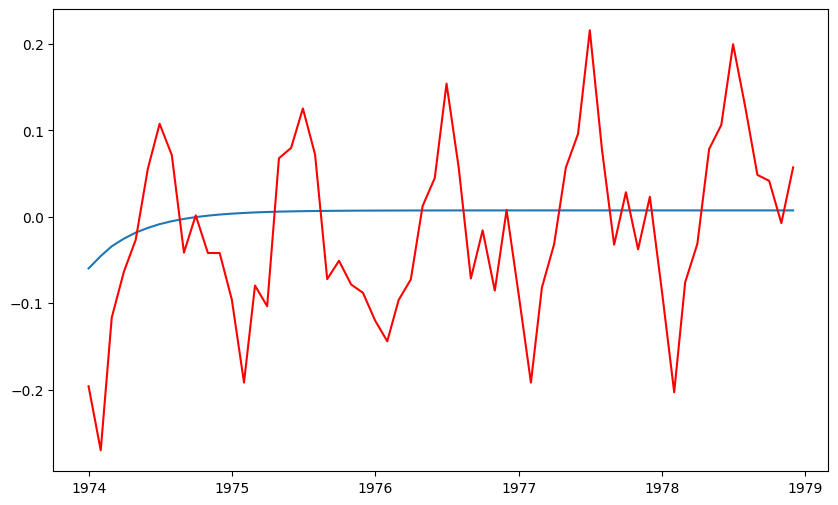

In [32]:
plt.plot(pred)
plt.plot(test, color='red')

### 7(e) : Calculate the Error

In [42]:

pip install scikit-learn


  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/5d/85/6dff36f75ed9707f65fbd15832d599e2ebec6962d2e52fbbfba22c2df088/scikit_learn-1.4.1.post1-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for joblib>=1.2.0 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/1e/84/ccd9b08653022b7785b6e3ee070ffb2825841e0dc119be22f0840b2b35cb/threadpoolctl-3.4.0-py3-none-any.whl.metadata
  Using cached threadpoolctl-3.4.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
    --------------------------------------- 0.2/10.6 MB 4.9 MB/s eta 0:00:03
   - -------------------------------------- 0.4/10.6 MB 5.3 MB/s eta 0:00:


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: C:\Users\Pulikesh\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [43]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse=sqrt(mean_squared_error(test,pred))
print(rmse)

0.09829782801419226


### 7(f) : Making future predictions

In [44]:
pred_future=model_1.predict(start=len(datasetLogScaleMinusMovingExponentialDecayAverage)+1, end=len(datasetLogScaleMinusMovingExponentialDecayAverage)+60, dynamic=False)
print("Prediction for next 5 years")
print(pred_future)
print("No. of predictions : \t", len(pred_future))

Prediction for next 5 years
1979-02-01    0.007453
1979-03-01    0.007453
1979-04-01    0.007453
1979-05-01    0.007453
1979-06-01    0.007453
1979-07-01    0.007453
1979-08-01    0.007453
1979-09-01    0.007453
1979-10-01    0.007453
1979-11-01    0.007453
1979-12-01    0.007453
1980-01-01    0.007453
1980-02-01    0.007453
1980-03-01    0.007453
1980-04-01    0.007453
1980-05-01    0.007453
1980-06-01    0.007453
1980-07-01    0.007453
1980-08-01    0.007453
1980-09-01    0.007453
1980-10-01    0.007453
1980-11-01    0.007453
1980-12-01    0.007453
1981-01-01    0.007453
1981-02-01    0.007453
1981-03-01    0.007453
1981-04-01    0.007453
1981-05-01    0.007453
1981-06-01    0.007453
1981-07-01    0.007453
1981-08-01    0.007453
1981-09-01    0.007453
1981-10-01    0.007453
1981-11-01    0.007453
1981-12-01    0.007453
1982-01-01    0.007453
1982-02-01    0.007453
1982-03-01    0.007453
1982-04-01    0.007453
1982-05-01    0.007453
1982-06-01    0.007453
1982-07-01    0.007453
1982-0

C:\Users\Pulikesh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


## Step - 8 : Implement ARIMA Model

### 8(a) : Deriving the parameters of ARIMA Models

Note :
* ARIMA model consists of 3 models
  - AR (Autoregression) model
  - Integration
  - MA (Movung Average) model
* ARIMA Model has 3 parameters
  - p : autoregressive lags
  - d : order of differnetiation (# times a time series is differentiated)
  - q : moving average

#### 8(a) - 1 : Compute d *value*
Differentiate the LogScale Data by 1 ie. d = 1

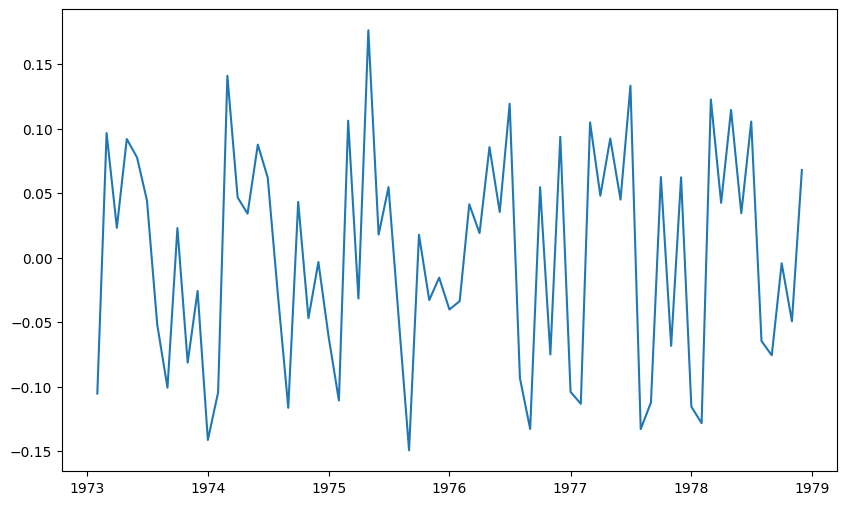

In [45]:
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

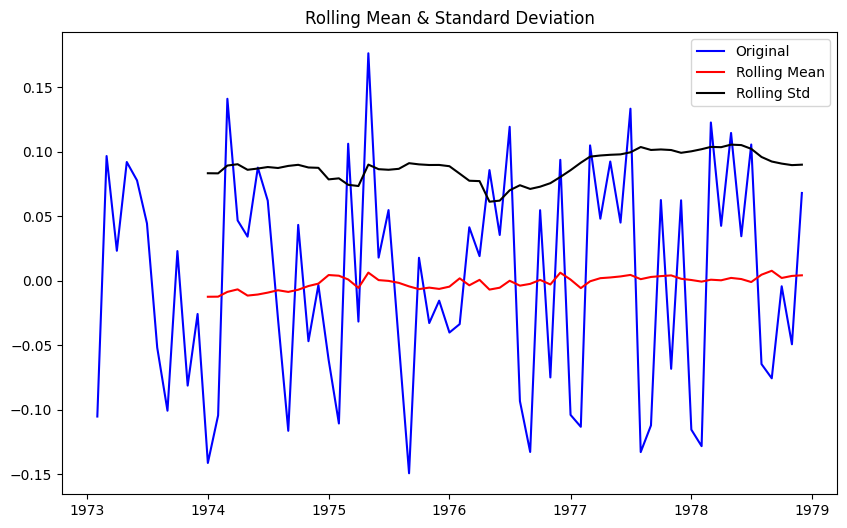

Results of Dickey Fuller Test
Test statistic              -2.711789
p-value                      0.072020
#Lags used                  12.000000
No. of observations used    58.000000
Critical value (1%)         -3.548494
Critical value (5%)         -2.912837
Critical value (10%)        -2.594129
dtype: float64


In [46]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

* Rolling Mean, Output is quite flat.
* Null Hypothesis / ADF is rejected as the time series is stationary.
* There is no trend



* This clearly states that, the time series is not stationary. So, we require the moving average parameter in place.

* We know the value of d = 1

#### 8(a)-2 : Compute p & q values

* Autocorrelation Function (ACF) Graph : To find q value
* Partial Autocorrelation Function (PACF) Graph : To compute p value

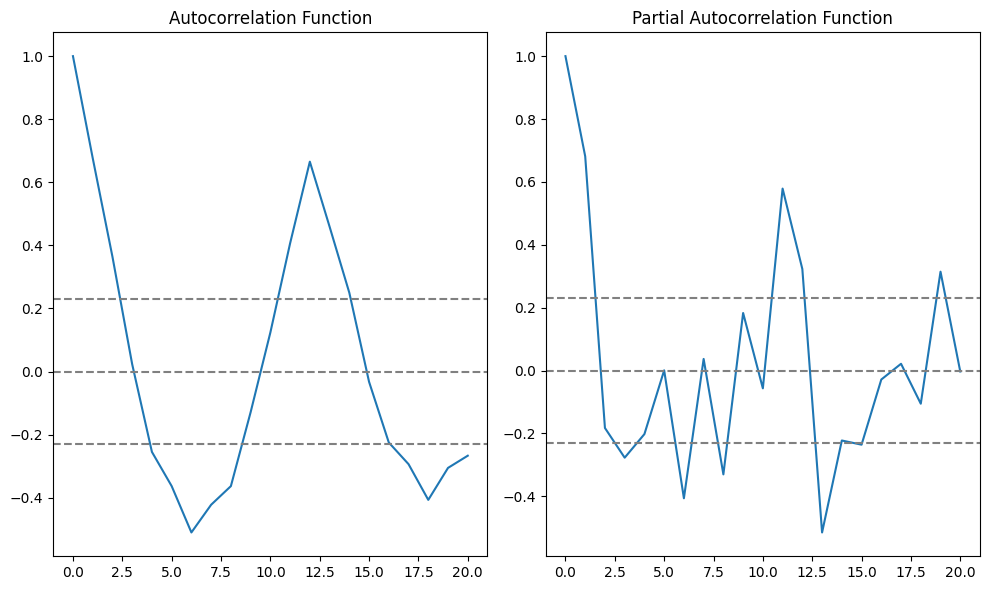

In [47]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(datasetLogScaleMinusMovingExponentialDecayAverage, nlags=20)
lag_pacf = pacf(datasetLogScaleMinusMovingExponentialDecayAverage,nlags=20, method='ols')

#Plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--',color='grey')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogScaleMinusMovingExponentialDecayAverage)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogScaleMinusMovingExponentialDecayAverage)), linestyle='--', color='gray')
plt.title("Autocorrelation Function")

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--',color='grey')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogScaleMinusMovingExponentialDecayAverage)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogScaleMinusMovingExponentialDecayAverage)), linestyle='--', color='gray')
plt.title("Partial Autocorrelation Function")
plt.tight_layout()

Check where the value drops to 0 for the first time in each of these graphs.
* In PACF graph : p value = 2 (around)
* In ACF graph : q value = 2 (around)

As we know the values of p, q, and d, Lets substitute the values in the ARIMA Model.

### 8(b) : Compute the Models

#### 8(b) - 1 : AR Model using ARIMA package

C:\Users\Pulikesh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Pulikesh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Pulikesh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Month
1973-01-01   -0.007117
1973-02-01   -0.002313
1973-03-01   -0.043451
1973-04-01    0.029815
1973-05-01    0.022447
                ...   
1978-08-01    0.137174
1978-09-01    0.062823
1978-10-01    0.013149
1978-11-01    0.021716
1978-12-01   -0.015988
Length: 72, dtype: float64
RSS: 0.361312
Plotting AR Model


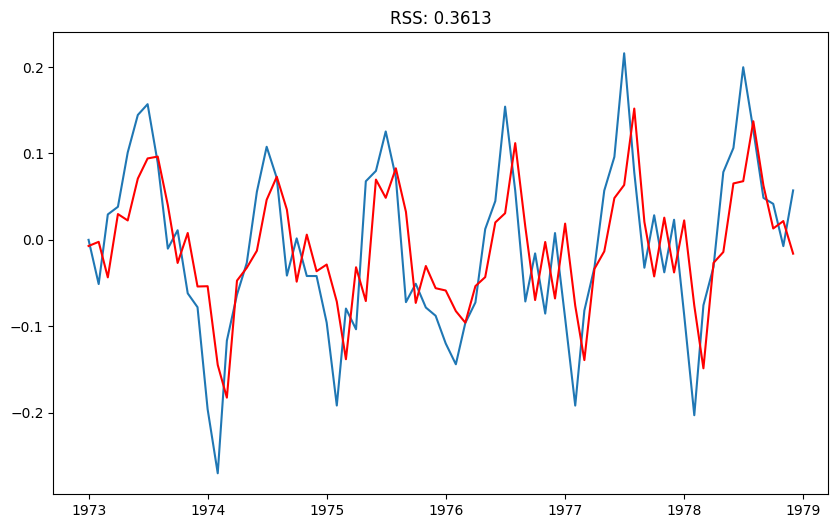

In [48]:
from statsmodels.tsa.arima.model import ARIMA
# AR Model
model_0 = ARIMA(datasetLogScaleMinusMovingExponentialDecayAverage, order=(2,0,0))
results_AR = model_0.fit()
print(results_AR.fittedvalues)
print('RSS: %f' % sum((results_AR.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['Accidental'])**2))
plt.plot(datasetLogScaleMinusMovingExponentialDecayAverage)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_AR.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['Accidental'])**2))
print("Plotting AR Model")

#### 8(b) - 2 : MA Model using ARIMA package

C:\Users\Pulikesh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Pulikesh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Pulikesh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Month
1973-01-01   -0.008161
1973-02-01   -0.003524
1973-03-01   -0.034104
1973-04-01    0.008422
1973-05-01    0.037661
                ...   
1978-08-01    0.113568
1978-09-01    0.064398
1978-10-01   -0.011599
1978-11-01    0.017483
1978-12-01    0.001344
Length: 72, dtype: float64
RSS: 0.366459
Plotting Ma Model


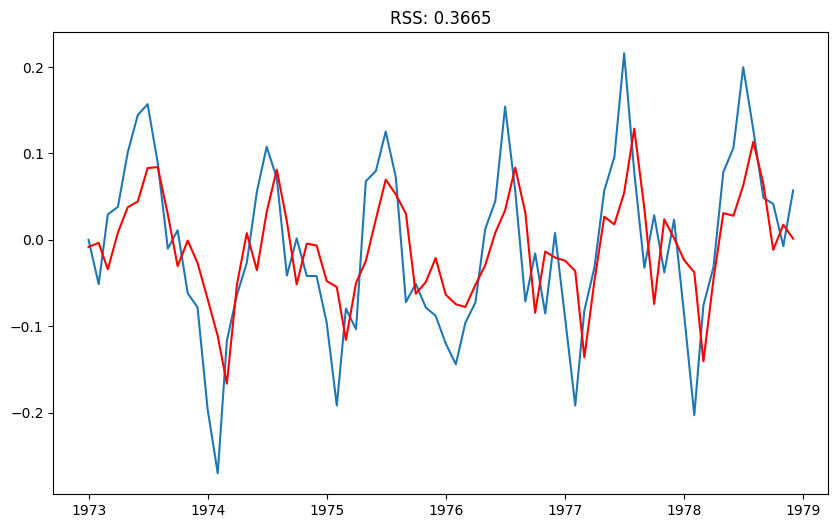

In [49]:
from statsmodels.tsa.arima.model import ARIMA
# MA Model
model_02 = ARIMA(datasetLogScaleMinusMovingExponentialDecayAverage, order=(0,0,2))
results_MA = model_02.fit()
print(results_MA.fittedvalues)
print('RSS: %f' % sum((results_MA.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['Accidental'])**2))
plt.plot(datasetLogScaleMinusMovingExponentialDecayAverage)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_MA.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['Accidental'])**2))
print("Plotting Ma Model")

 #### 8(b) - 3 : ARMA Model using ARIMA package

C:\Users\Pulikesh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Pulikesh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Pulikesh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Month
1973-01-01   -0.012731
1973-02-01   -0.004352
1973-03-01   -0.042807
1973-04-01    0.010525
1973-05-01    0.025036
                ...   
1978-08-01    0.130257
1978-09-01    0.069549
1978-10-01   -0.010167
1978-11-01   -0.036916
1978-12-01   -0.065535
Length: 72, dtype: float64
RSS: 0.308937
Plotting ARIMA Model


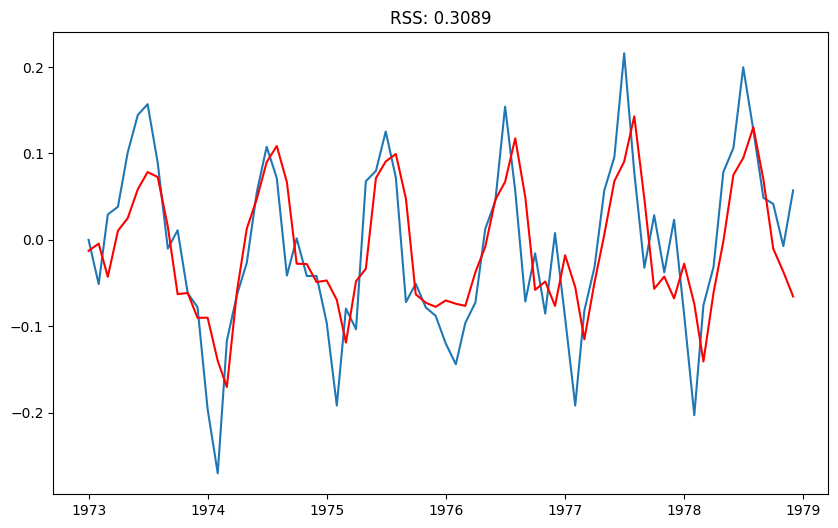

In [50]:
from statsmodels.tsa.arima.model import ARIMA
# ARMA Model
model_03 = ARIMA(datasetLogScaleMinusMovingExponentialDecayAverage, order=(2,0,2))
results_ARMA = model_03.fit()
print(results_ARMA.fittedvalues)
print('RSS: %f' % sum((results_ARMA.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['Accidental'])**2))
plt.plot(datasetLogScaleMinusMovingExponentialDecayAverage)
plt.plot(results_ARMA.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_ARMA.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['Accidental'])**2))
print("Plotting ARIMA Model")

 #### 8(b) - 4 : ARIMA Model using ARIMA package

C:\Users\Pulikesh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Pulikesh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Pulikesh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Pulikesh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'

Month
1973-01-01    0.000000
1973-02-01    0.000000
1973-03-01   -0.053726
1973-04-01    0.026350
1973-05-01    0.054558
                ...   
1978-08-01    0.201645
1978-09-01    0.128700
1978-10-01    0.019807
1978-11-01    0.031822
1978-12-01    0.019634
Length: 72, dtype: float64
RSS: 0.391802
Plotting ARIMA Model


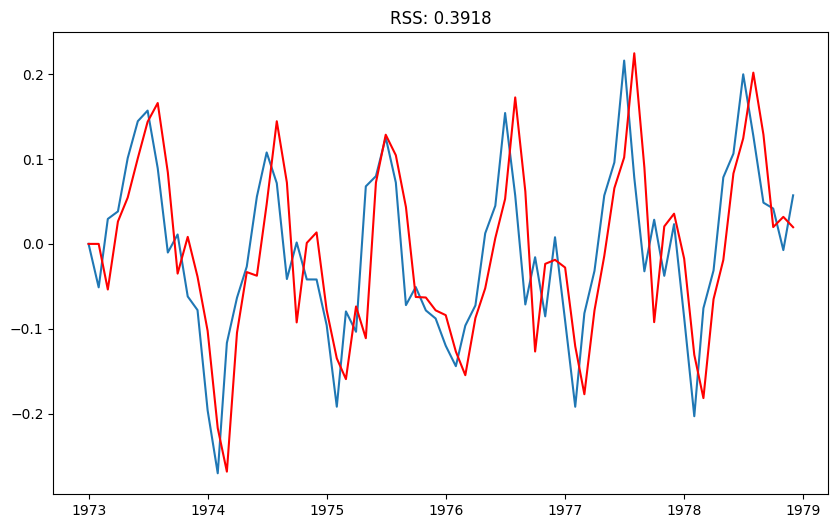

In [51]:
from statsmodels.tsa.arima.model import ARIMA
# ARIMA Model
model_1 = ARIMA(datasetLogScaleMinusMovingExponentialDecayAverage, order=(2,1,2))
results_ARIMA = model_1.fit()
print(results_ARIMA.fittedvalues)
print('RSS: %f' % sum((results_ARIMA.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['Accidental'])**2))
plt.plot(datasetLogScaleMinusMovingExponentialDecayAverage)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_ARIMA.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['Accidental'])**2))
print("Plotting ARIMA Model")

### 8(c) : Install the pmdarima package

In [52]:
pip install pmdarima

  Obtaining dependency information for pmdarima from https://files.pythonhosted.org/packages/cb/70/0d357e09b452088952eb6a137d7f7e1fd600e24fccd33b5add39020e3a85/pmdarima-2.0.4-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for Cython!=0.29.18,!=0.29.31,>=0.29 from https://files.pythonhosted.org/packages/83/42/9537a513d7d83196ab5973d911056eb22a639e04162fd649cf74b4dac3f1/Cython-3.0.10-cp310-cp310-win_amd64.whl.metadata
   ---------------------------------------- 0.0/613.3 kB ? eta -:--:--
   ------ --------------------------------- 92.2/613.3 kB 1.7 MB/s eta 0:00:01
   ------------- -------------------------- 204.8/613.3 kB 2.1 MB/s eta 0:00:01
   -------------------- ------------------- 307.2/613.3 kB 2.1 MB/s eta 0:00:01
   ------------------------ --------------- 368.6/613.3 kB 2.1 MB/s eta 0:00:01
   --------------------------- ------------ 419.8/613.3 kB 1.8 MB/s eta 0:00:01
   -------------------------------- ------- 501.8/613.3 kB 1.7 MB/s eta 0:00:01
   ----


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: C:\Users\Pulikesh\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [53]:
from pmdarima import auto_arima
#ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [54]:
stepwise_fit=auto_arima(indexedDataset_logScale, trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-158.268, Time=0.79 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-112.620, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-158.389, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-148.657, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=523.937, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-158.691, Time=0.26 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-161.870, Time=0.27 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-161.862, Time=0.83 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-160.460, Time=0.68 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-155.308, Time=0.56 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-159.909, Time=0.97 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.53 sec

Best model:  ARIMA(3,0,0)(0,0,0)[0] intercept
Total fit time: 5.268 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   72
Model:               SARIMAX(3, 0, 0)   Log Likelihood                  85.935
Date:                Sun, 31 Mar 2024   AIC                           -161.870
Time:                        23:56:46   BIC                           -150.487
Sample:                    01-01-1973   HQIC                          -157.338
                         - 12-01-1978                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.9812      1.033      3.854      0.000       1.957       6.006
ar.L1          0.7717      0.117      6.593      0.000       0.542       1.001
ar.L2          0.0593      0.168      0.353      0.724      -0.270       0.389
ar.L3         -0.2696      0.120     -2.248      0.025      -0.505      -0.035
sigma2         0.0053      0.001      4.174      0.000       0.003       0.008
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 2.88
Prob(Q):                              0.72   Prob(JB):                         0.24
Heteroskedasticity (H):               1.36   Skew:                            -0.35
Prob(H) (two-sided):                  0.46   Kurtosis:                         2.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Note : SARIMAX - ARIMA with seasonality

#### Fit the ARIMA Model

Month
1973-01-01    0.000000
1973-02-01    0.000000
1973-03-01   -0.056793
1973-04-01    0.037745
1973-05-01    0.049531
                ...   
1978-08-01    0.173089
1978-09-01    0.041749
1978-10-01    0.044984
1978-11-01   -0.042712
1978-12-01    0.039347
Length: 72, dtype: float64
RSS: 0.258345
Plotting ARIMA Model


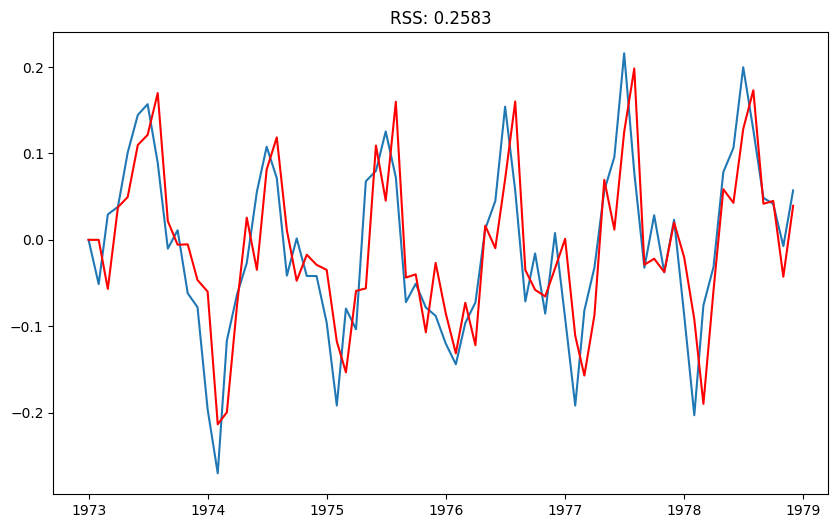

In [56]:
from statsmodels.tsa.arima.model import ARIMA
# ARIMA Model
model_2 = ARIMA(datasetLogScaleMinusMovingExponentialDecayAverage, order=(4,1,3))
results_ARIMA = model_2.fit()
print(results_ARIMA.fittedvalues)
print('RSS: %f' % sum((results_ARIMA.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['Accidental'])**2))
plt.plot(datasetLogScaleMinusMovingExponentialDecayAverage)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_ARIMA.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['Accidental'])**2))
print("Plotting ARIMA Model")

### 8(d) : Prepare the fitted values for predictions

Month
1973-02-01    0.000000
1973-03-01   -0.105398
1973-04-01    0.006043
1973-05-01    0.012381
1973-06-01    0.038321
                ...   
1978-08-01   -0.001793
1978-09-01   -0.052488
1978-10-01    0.031820
1978-11-01   -0.062774
1978-12-01    0.071457
Length: 71, dtype: float64
RSS: 0.387134
Plotting ARIMA Model


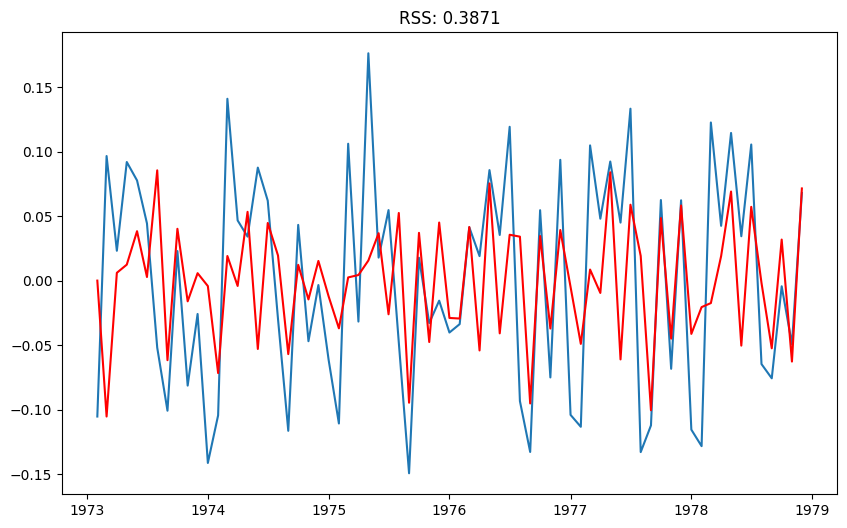

In [57]:
from statsmodels.tsa.arima.model import ARIMA
# ARIMA Model with
model_3 = ARIMA(datasetLogDiffShifting, order=(4,1,3))
results_ARIMA = model_3.fit()
print(results_ARIMA.fittedvalues)
print('RSS: %f' % sum((results_ARIMA.fittedvalues-datasetLogDiffShifting['Accidental'])**2))
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_ARIMA.fittedvalues-datasetLogDiffShifting['Accidental'])**2))
print("Plotting ARIMA Model")

#### 8(d) - 1 : Convert the fitted values into a Series Format

In [58]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues,copy=True)
print(predictions_ARIMA_diff.head())

Month
1973-02-01    0.000000
1973-03-01   -0.105398
1973-04-01    0.006043
1973-05-01    0.012381
1973-06-01    0.038321
dtype: float64


#### 8(d)- 2 : Find the Cummulative Sum and find the predictions for the fitted values

In [59]:
#Convert to Cummulative Sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Month
1973-02-01    0.000000
1973-03-01   -0.105398
1973-04-01   -0.099354
1973-05-01   -0.086973
1973-06-01   -0.048652
dtype: float64


In [60]:
predictiona_ARIMA_log = pd.Series(indexedDataset_logScale['Accidental'].iloc[0],index = indexedDataset_logScale.index)
predictiona_ARIMA_log = predictiona_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictiona_ARIMA_log.head()

Month
1973-01-01    9.105757
1973-02-01    9.105757
1973-03-01    9.000360
1973-04-01    9.006403
1973-05-01    9.018784
dtype: float64

#### 8(d)-3 :  Perform Exponential of the data to bring it to original form

In [61]:
predictions_ARIMA = np.exp(predictiona_ARIMA_log)

#### 8(d)-4: Plot the predictions made by ARIMA Model over the original Data

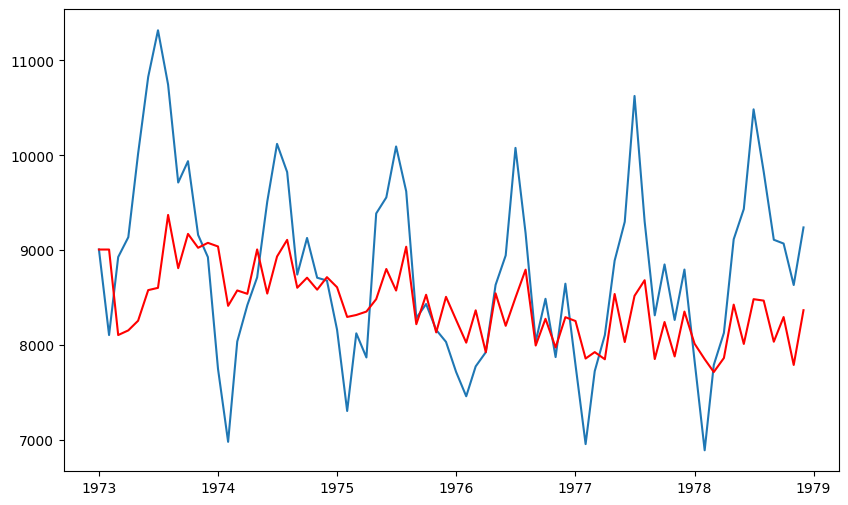

In [62]:
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA, color='red')

NOte:  Here the ARIMA model capture the shape of the Time Series. Only the magnitude varies.

### 8(e) : Predictions for 2 years

In [63]:
# Check the dimension of the dataset
indexedDataset_logScale

,Accidental
Month,
1973-01-01,9.105757
1973-02-01,9.000360
1973-03-01,9.096948
1973-04-01,9.120087
1973-05-01,9.212039
...,...
1978-08-01,9.192889
1978-09-01,9.117128
1978-10-01,9.112728


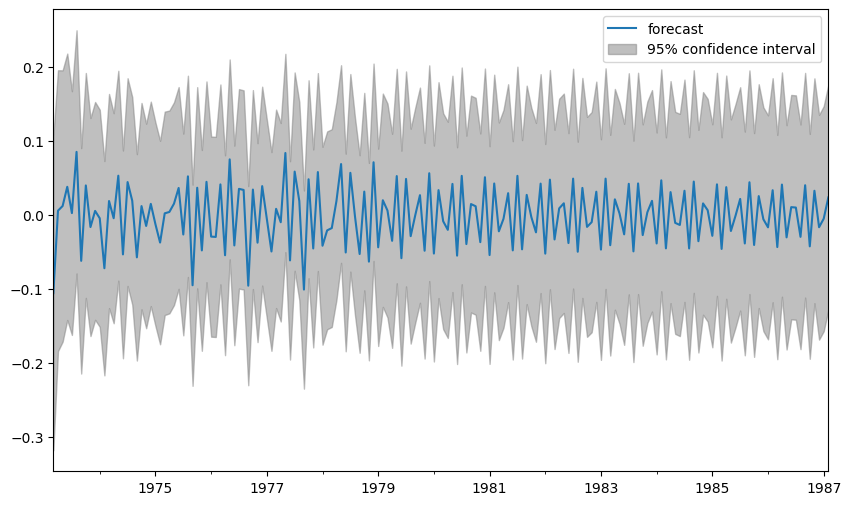

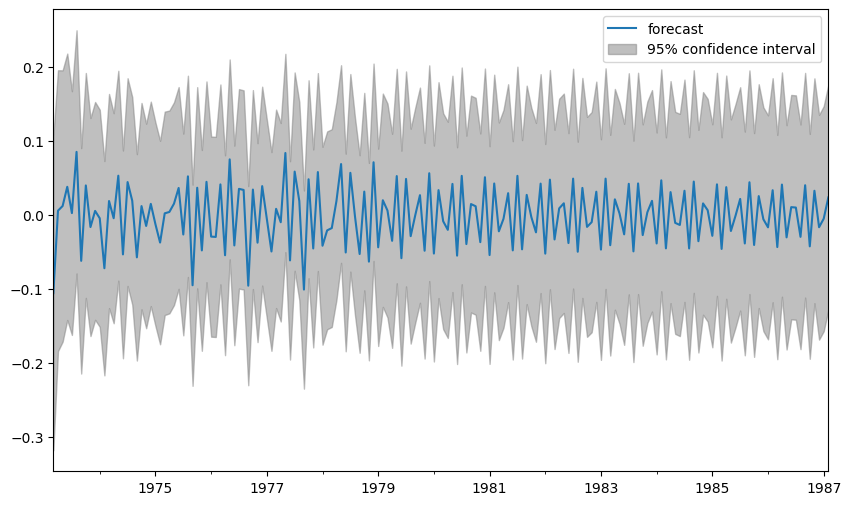

In [64]:
from statsmodels.graphics.tsaplots import plot_predict
# We have 144 rows + 24 to be predictions
plot_predict(results_ARIMA,1,168)

In [65]:
results_ARIMA.forecast(steps=24)

1979-01-01   -0.043444
1979-02-01    0.020166
1979-03-01    0.006264
1979-04-01   -0.034657
1979-05-01    0.052802
1979-06-01   -0.058136
1979-07-01    0.048972
1979-08-01   -0.028352
1979-09-01    0.000331
1979-10-01    0.026990
1979-11-01   -0.048058
1979-12-01    0.056655
1980-01-01   -0.051855
1980-02-01    0.033829
1980-03-01   -0.008190
1980-04-01   -0.019826
1980-05-01    0.042236
1980-06-01   -0.054688
1980-07-01    0.053099
1980-08-01   -0.039059
1980-09-01    0.014994
1980-10-01    0.012026
1980-11-01   -0.036459
1980-12-01    0.051235
Freq: MS, Name: predicted_mean, dtype: float64

### Approach  - 2

In [69]:
from statsmodels.tsa.arima.model import ARIMA
print(datasetLogScaleMinusMovingExponentialDecayAverage.shape)
train=datasetLogScaleMinusMovingExponentialDecayAverage.iloc[:-60]
test=datasetLogScaleMinusMovingExponentialDecayAverage.iloc[-60:]
print(train.shape,test.shape)

(72, 1)
(12, 1) (60, 1)


In [70]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,type='levels')
print(pred)

NameError: name 'model' is not defined